<a href="https://colab.research.google.com/github/abelowska/mlNeuro/blob/main/MLN_basic_mne_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNE: exercises

[`MNE`](https://mne.tools/stable/index.html) is an open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG, sEEG, ECoG, NIRS, and more.

The easiest way is to install MNE via Anaconda, `pip`, or `conda` (see [installation instructions](https://mne.tools/stable/install/manual_install.html)).

In [ ]:
!pip install mne

Imports

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd

## Recap

Basic MNE classes:
1. [`Raw`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw)

```
# if your data are .fif file, you can use the default read method
raw = mne.io.read_raw(file_name, preload=True)
```

2. [`Epochs`](https://mne.tools/stable/generated/mne.Epochs.html)

```
events, event_ids = mne.events_from_annotations(raw)

epochs = mne.Epochs(
  raw=raw,
  events=events,
  event_id=event_ids,
  tmin=0.0,
  tmax=0.8,
  baseline=(-0.2, 0),
  preload=True,
)
```

3. [`Evoked`](https://mne.tools/stable/generated/mne.Evoked.html)

```
evoked = epochs[event_id].average()
```



## Read data to `Raw`

We are going to use data from the [ERP CORE Dataset](https://doi.org/10.1016/j.neuroimage.2020.117465). This dataset contains EEG recordings from a single participant performing Flanker task.

In [ ]:
data_dir = Path(mne.datasets.erp_core.data_path('.'))
file_name = data_dir / "ERP-CORE_Subject-001_Task-Flankers_eeg.fif"

raw = mne.io.read_raw(file_name, preload=True)

## Exercises

### Raw

**Exercise 1**: Selecting and dropping channels for.

Altering the channels of a Raw object can be done in several ways. Try to use the [`pick()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.pick) method to restrict the Raw object to just the EEG channels.

In [ ]:
# always work on the copy of the original data
raw_copy = raw.copy()

# your code here

**Exercise 2**: Selecting data in the time domain.

If you want to limit the time domain of a `Raw` object, you can use the [`crop()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.crop) method. Limit your `Raw` to time-window 1min - 10min.

In [ ]:
# always work on the copy of the original data
print(raw.times.min(), raw.times.max())
raw_copy = raw.copy()

# your code here

print(raw_copy.times.min(), raw_copy.times.max())

**Exercise 3**: Extracting data from `Raw` objects.

There are multiple ways of extracting data from a `Raw` object into a NumPy array.

**3.1** To select portions of the data, `Raw` objects can be indexed using square brackets, where the first dimention are *channels*, and the second *timepoints*. Along with the requested sample value(s) `MNE-Python` also returns an array of times (in seconds) corresponding to the requested samples. The data array and the times array are returned together as elements of a tuple.

Try to select data from 1st to 2nd minute on FCz channel. Mind, that when extracting data with slicing, you need to provide *timepoints*, not *seconds*. Use the sampling frequency to find correct indexes.

In [ ]:
sampling_freq = raw.info["sfreq"]
start_stop_seconds = # TODO
start_sample, stop_sample = # TODO

channel_index = # find which index has FCz in raw.info.ch_names list
raw_selection_data, raw_selection_times = # TODO

print(raw_selection_times)

**3.2** `Raw.get_data()` method.

If you only want the data, `Raw` objects have a [`get_data()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.get_data) method. It returns data as (n_channels, n_timepoints) NumPy array.

Use `get_data()` method to extract exactly the same data as in previous exercise. Plot both arrays to make sure you have indeed extracted the same slice of data.

In [ ]:
# your code here

For overview of methods for extracting data from `Raw` object, see: [documentation](https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html#summary-of-ways-to-extract-data-from-raw-objects).

### Epochs

**Exercise 4**: Usually we want to have epochs with only one type of single-trials, e.g., stimulus-locked, or response-locked.

Create epochs in such a way as to have only stimuli-locked epochs. Look into the documentation of [`Epochs`](https://mne.tools/stable/generated/mne.Epochs.html) constructor and find which parameter defines the events of interest.

In [ ]:
tmin=-0.2
tmax=0.8

events, event_ids = mne.events_from_annotations(raw)

epochs = mne.Epochs(
  raw=raw.copy().filter(0.05, 40),
  # TODO
)

**Exercise 5**: For now, we are not interested in *left/right* differentiation, only *congruent/incongruent*. Try to create epochs that contains only congruent vs incongruent epochs. Use [`merge_events()`](https://mne.tools/stable/generated/mne.merge_events.html#mne.merge_events) method to merge events twice: once congruent, and one incongruent; and then build `Epochs` based on new events array.

In [ ]:
# your code here

**Alternative way**: You can also familiarize with [this tutorial](https://mne.tools/stable/auto_tutorials/epochs/10_epochs_overview.html#tut-section-subselect-epochs) to understand how to properly pool trial types to analyses, when events are constructed with '\\'.

**Exercise 6**: Compare epochs from two conditions (time-domain analysis)

We know that congruent and incongruent stimuli should differentially affect brain response. Let's check whether this effect is visible in our dataset. Usually, such an analysis is performed on Evoked, but as we have data from only one participant, we will do this on single epochs.

First, compare the epochs visually. We can do this using the previously mentioned [`mne.viz.compare_evokeds()`](https://mne.tools/stable/generated/mne.viz.plot_compare_evokeds.html#mne.viz.plot_compare_evokeds) method. Instead of Evoked objects, we can provide Epochs objects, but force `MNE` to iterate over epochs as a sequence of Evoked objects using the [`iter_evoked()`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.iter_evoked) method:

In [ ]:
picks = 'FCz'

evokeds = dict(
    congruent=list(epochs["compatible"].iter_evoked()),
    incongruent=list(epochs["incompatible"].iter_evoked()),
)

fig = mne.viz.plot_compare_evokeds(evokeds, picks=picks)

Based on the plot above extract data from the time window of your choice for each condition using the [`get_data()`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.get_data) method. Then, average the data within the time window and compare congruent and incongruent epochs using the [`ttest_rel()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) method from `scipy`, e.g.:

```
scipy.stats.ttest_rel(compatibile_data, incompatibile_data)
```
Keep in mind that your observations are epochs, and you have only one feature: mean amplitude (voltage) in the time window at one channel. Thus, for each condition, you should have an array of shape `(200, 1)`.

In [ ]:
# your code here

**Exercise 7**: Spectral analysis.

We want to compare power of brain bands of congruent vs incongruent trials, to see if there is any difference in any **power band**. To do so, we can use [`compute_psd()`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.compute_psd) method to create the **spectral representation of each epoch**.

**6.1** Using `compute_psd()` metod, create `epochs_spectrum` variable that contains spectral representation of our epochs with the lower-bound of frequencies set on 1Hz and the upper-bound set on 100 Hz. Mind, that `compute_psd()` returns [`EpochsSpectrum`](https://mne.tools/stable/generated/mne.time_frequency.EpochsSpectrum.html#mne.time_frequency.EpochsSpectrum) object. Plot the results using default [`plot()`](https://mne.tools/stable/generated/mne.time_frequency.EpochsSpectrum.html#mne.time_frequency.EpochsSpectrum.plot) method for `EpochsSpectrum`.

**Why there is so big drop in power of frequencies above 40 Hz?**

In [ ]:
epochs_spectrum = # TODO

**6.2** Now, when you have `EpochsSpectrum`, you can use [`plot_topomap()`](https://mne.tools/stable/generated/mne.time_frequency.EpochsSpectrum.html#mne.time_frequency.EpochsSpectrum.plot_topomap) method to plot brain bands. The plots should looks like this:

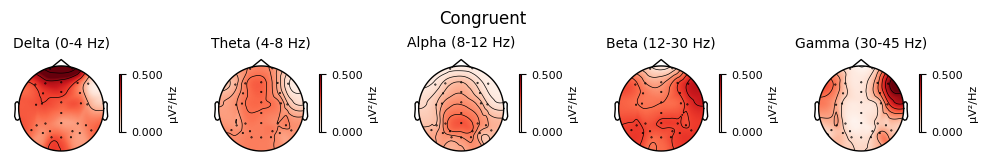

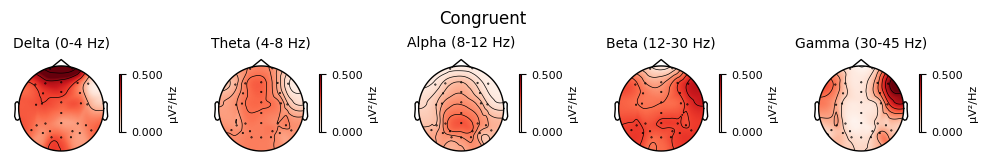

In [ ]:
# your code here

**Exercise 8**: Spectral analysis.

It is not an easy thing to see (and decide) whether there is a difference in any frequency between congruent and incongruent conditions. To obtain better indicators of the difference, we can perform a simple t-test to compare the values of given frequencies in epochs between the two conditions.

**HINT:**
- create `EpochsSpectrum`
- for each combination of condition (compatible, incompatible) and brain band (delta, theta, alpha) extract data from `EpochsSpectrum` using [`get_data()`](https://mne.tools/stable/generated/mne.time_frequency.EpochsSpectrum.html#mne.time_frequency.EpochsSpectrum.get_data) method
- average power within bands to have one value per epoch/band
- perform t-test on related samples. You can use [`ttest_rel()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) method from `scipy`, e.g.:

```
scipy.stats.ttest_rel(alpha_compatibile_data, alpha_incompatibile_data)
```

Can you answer whether there is any difference between the two conditions in brain bands?

In [ ]:
# your code here

---
MNE-Python offers a huge number of tools for working on EEG signals. It also has great [tutorials](https://mne.tools/stable/auto_tutorials/index.html) and [examples](https://mne.tools/stable/auto_examples/index.html). I strongly encourage you to familiarize yourself with them.